# Orders

In [1]:
# Auto reload imported module every time a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()
from olist.order import Order

In [4]:
# What datasets do we have access to now ?
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [5]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

assert(orders.shape == (99441, 8))

In [6]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## 1) Create Get_wait_time function 
#### Dataframe with  `wait_time`, `expected_wait_time`, `delay_vs_expected`

In [8]:
orders = orders[orders['order_status'] == 'delivered']

In [9]:
# handle datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [10]:
# Compute just the number of days in each time_delta
one_day_delta = datetime.timedelta(days=1) # a "timedelta" object of 1 day

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = \
    (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = \
    (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta

In [11]:
# REmoving anything below 0
def handle_delay(x):
    if x > 0:
        return x
    else:
        return 0

orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)

In [12]:
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']]

,order_id,wait_time,expected_wait_time,delay_vs_expected
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0


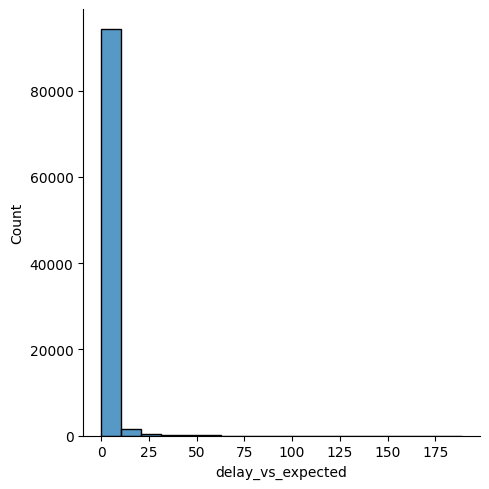

In [13]:
sns.displot(orders['delay_vs_expected'])

In [14]:
# Create get_wait_time
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


## 2) `get_review_score`
      Returns a DataFrame with:
      order_id, dim_is_five_star, dim_is_one_star, review_score



👉 We load the `reviews` for you

In [15]:
reviews = data['order_reviews'].copy()
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [16]:
dim_is_one_star = lambda x: int(x==1)
dim_is_five_star = lambda x: int(x==5)

reviews["dim_is_five_star"] = reviews["review_score"].map(dim_is_five_star)
reviews["dim_is_one_star"] = reviews["review_score"].map(dim_is_one_star)

In [17]:
reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


## 3) `get_number_products`:
    Returns a DataFrame with:
    order_id, number_of_products (total number of products per order)

In [15]:
data["order_items"].groupby("order_id").count()\
    .rename(columns={"order_item_id": "number_of_items"})\
    .sort_values("number_of_items")[['number_of_items']]

,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,a6e9d106235bcf1dda54253686d89e99,1
2,a6e9b80a7636eb8dd592dbb3e20d0a91,1
3,a6e963c11e80432334e984ead4797a8b,1
4,a6e8ad5db31e71f5f12671af561acb4a,1
...,...,...
98661,428a2f660dc84138d969ccd69a0ab6d5,15
98662,9ef13efd6949e4573a18964dd1bbe7f5,15
98663,1b15974a0141d54e36626dca3fdc731a,20
98664,ab14fdcfbe524636d65ee38360e22ce8,20


## 4) `get_number_sellers`:
    Returns a DataFrame with:
    order_id, number_of_sellers (total number of unique sellers per order)
        


In [19]:
sellers = \
    data['order_items']\
    .groupby('order_id')['seller_id'].nunique().reset_index()

sellers.columns = ['order_id', 'number_of_sellers']
sellers.sort_values('number_of_sellers')

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
65559,aaaf314a8cf0d0da71e52c6cd4184cbd,1
65558,aaaea350ff8a957595f3c631d6b63d1b,1
65557,aaae80f5b6239bd9e1b22e9aa542c3e8,1
65556,aaabf43feb9498d9de4588eb73231c25,1
...,...,...
11231,1d23106803c48c391366ff224513fb7f,4
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5


## 5) `get_price_and_freight`
    Returns a DataFrame with:
    order_id, price, freight_value


In [20]:
price_freight = \
    data['order_items']\
    .groupby('order_id',
             as_index=False).agg({'price': 'sum',
                                  'freight_value': 'sum'})
price_freight

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


## All at once: `get_training_data`

In [21]:
Order().get_training_data()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,dim_two_star,dim_three_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,0,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,0,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,0,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,1,0,0,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,0,0,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,1,0,0,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,0,0,1,0,2,2,1,359.98,81.18
